In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np

Download the dataset here:

https://data.opendatasoft.com/explore/dataset/air-quality-data-continuous%40bristol/table/?disjunctive.location&sort=date_time

In [2]:
df = pd.read_csv('./data/air-quality-bristol-2022.csv', delimiter=';',
                )
df['Latitude'] = df['geo_point_2d'].apply(lambda x: x.split(',')[0]).astype(float)
df['Longitude'] = df['geo_point_2d'].apply(lambda x: x.split(',')[1]).astype(float)
df = df.drop(columns='geo_point_2d')
df

Date Time       NOx      NO2       NO  SiteID    PM10  \
0      2021-12-31T23:00:00+00:00  102.7500  43.5000  38.2500     501     NaN   
1      2021-12-31T23:00:00+00:00   20.7500  10.7500   6.5000     463     NaN   
2      2021-12-31T23:00:00+00:00   18.3600  10.3275   5.2387     500  20.290   
3      2022-01-01T00:00:00+00:00    8.6483   7.1355   0.9866     452  26.087   
4      2021-12-31T23:00:00+00:00   12.2500   8.5000   2.5000     203     NaN   
...                          ...       ...      ...      ...     ...     ...   
70267  2022-11-29T18:00:00+00:00   92.2500  32.7500  38.7500     270     NaN   
70268  2022-11-29T23:00:00+00:00   27.2500  15.2500   8.0000     270     NaN   
70269  2022-11-30T09:00:00+00:00  164.7500  34.5000  84.7500     270     NaN   
70270  2022-11-30T11:00:00+00:00   88.0000  31.2500  37.0000     270     NaN   
70271  2022-11-30T20:00:00+00:00  186.2500  39.2500  96.0000     270     NaN   

       NVPM10  VPM10  NVPM2.5  PM2.5  ...  Temperature  RH  Air Pressure  \
0         NaN    NaN      NaN    NaN  ...          NaN NaN           NaN   
1         NaN    NaN      NaN    NaN  ...          NaN NaN           NaN   
2         NaN    NaN      NaN    NaN  ...         11.5 NaN           NaN   
3         NaN    NaN      NaN   20.0  ...         11.4 NaN           NaN   
4         NaN    NaN      NaN    NaN  ...          NaN NaN           NaN   
...       ...    ...      ...    ...  ...          ...  ..           ...   
70267     NaN    NaN      NaN    NaN  ...          NaN NaN           NaN   
70268     NaN    NaN      NaN    NaN  ...          NaN NaN           NaN   
70269     NaN    NaN      NaN    NaN  ...          NaN NaN           NaN   
70270     NaN    NaN      NaN    NaN  ...          NaN NaN           NaN   
70271     NaN    NaN      NaN    NaN  ...          NaN NaN           NaN   

                Location                  DateStart  DateEnd  Current  \
0         Colston Avenue  2018-11-30T00:00:00+00:00      NaN     True   
1         Fishponds Road  2009-03-13T00:00:00+00:00      NaN     True   
2             Temple Way  2017-08-01T00:00:00+00:00      NaN     True   
3          AURN St Pauls  2006-06-15T00:00:00+00:00      NaN     True   
4      Brislington Depot  2001-01-01T00:00:00+00:00      NaN     True   
...                  ...                        ...      ...      ...   
70267         Wells Road  2003-05-23T00:00:00+00:00      NaN     True   
70268         Wells Road  2003-05-23T00:00:00+00:00      NaN     True   
70269         Wells Road  2003-05-23T00:00:00+00:00      NaN     True   
70270         Wells Road  2003-05-23T00:00:00+00:00      NaN     True   
70271         Wells Road  2003-05-23T00:00:00+00:00      NaN     True   

              Instrument Type   Latitude  Longitude  
0      Continuous (Reference)  51.455269  -2.596649  
1      Continuous (Reference)  51.478045  -2.535230  
2      Continuous (Reference)  51.457950  -2.583989  
3      Continuous (Reference)  51.462829  -2.584541  
4      Continuous (Reference)  51.441747  -2.559956  
...                       ...        ...        ...  
70267  Continuous (Reference)  51.427864  -2.563742  
70268  Continuous (Reference)  51.427864  -2.563742  
70269  Continuous (Reference)  51.427864  -2.563742  
70270  Continuous (Reference)  51.427864  -2.563742  
70271  Continuous (Reference)  51.427864  -2.563742  

[70272 rows x 24 columns]

**Questions**

- Where are the stations located?
- Time series of ...
- Correlation of ...

**Technical aspect**

- correlation function

In [3]:
df = df.query('Current')

In [4]:
loc_df = df[['Latitude', 'Longitude', 'Location']].drop_duplicates()
loc_df

Latitude  Longitude              Location
0  51.455269  -2.596649        Colston Avenue
1  51.478045  -2.535230        Fishponds Road
2  51.457950  -2.583989            Temple Way
3  51.462829  -2.584541         AURN St Pauls
4  51.441747  -2.559956     Brislington Depot
5  51.432676  -2.604957  Parson Street School
6  51.459142  -2.595433    Marlborough Street
8  51.427864  -2.563742            Wells Road

In [5]:
import plotly.express as px

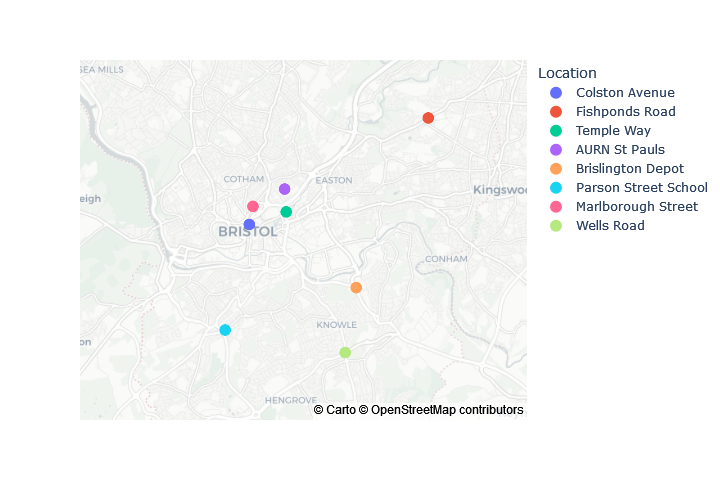

In [6]:
fig = px.scatter_mapbox(loc_df, lon='Longitude', lat='Latitude',
                        zoom=11, height=500, width=600,
                        color='Location',
                       )
fig.update_layout(mapbox_style="carto-positron")
fig.update_traces(marker=dict(size=12, ),
                  mode='markers',
                  selector=dict(mode='markers'))
fig.show()

In [7]:
df['Day'] = pd.to_datetime(df['Date Time']).dt.day_of_year
df['Date Time'] = pd.to_datetime(df['Date Time'])

In [8]:
df2 = df.query("Location in ['Marlborough Street', 'AURN St Pauls', 'Wells Road']").dropna(axis=1, how='all')
df2 = df2.sort_values('Date Time', ascending=True)

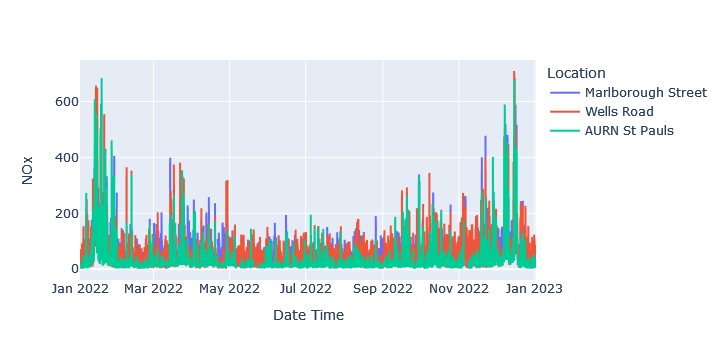

In [9]:
fig = px.line(df2,
              x='Date Time',
              y='NOx',
              color='Location'
                 )

fig.show()

In [37]:
locs = df['Location'].unique()

dd = {}

for loc in locs:
    tmp = df.query(f"Location == '{loc}'").sort_values('Date Time', ascending=True)
    dd[loc] = tmp['NOx'].values
    
df3 = pd.DataFrame(dd)
df3

Colston Avenue  Fishponds Road  Temple Way  AURN St Pauls  \
0             102.75           20.75     18.3600         8.9887   
1             111.75           16.25     22.1037         8.6483   
2              99.50           15.75     36.5433         5.3882   
3              68.25           25.00     27.7350         6.0347   
4              63.25           23.00     14.5227         5.2804   
...              ...             ...         ...            ...   
8779           39.50           23.25     69.0393        15.3990   
8780           51.75           17.00     59.4864        36.7836   
8781           61.50           23.50     59.6413        30.1840   
8782           77.25           21.25     76.6430        29.7236   
8783           65.75           12.75     80.8643        28.3935   

      Brislington Depot  Parson Street School  Marlborough Street  Wells Road  
0                 12.25                 14.00               35.75       23.50  
1                  8.25                 12.50               29.75       20.00  
2                 10.00                 11.00               24.00       21.50  
3                  8.25                  8.75               21.00       17.50  
4                  7.00                  8.25               15.75       16.00  
...                 ...                   ...                 ...         ...  
8779              24.75                 25.75               32.25       54.50  
8780              21.75                 19.50               41.25       58.00  
8781              35.25                 33.00               47.75       50.25  
8782              21.00                 22.25               42.50       48.00  
8783              11.25                 13.50               25.00       44.50  

[8784 rows x 8 columns]

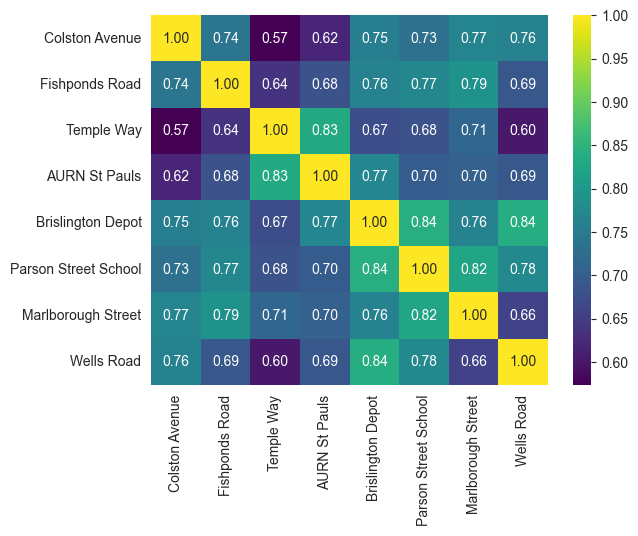

In [41]:
corr = df3.corr()

sns.heatmap(corr, cmap='viridis',
            annot=True, fmt='.2f',
           )

plt.savefig('./plots/2023-11-10_bristol_correlation_station_nox.png', dpi=150, bbox_inches='tight')
plt.show()

In [11]:
df = df.dropna(axis=1, how='all')

In [12]:
df_paul = df.query("Location == 'AURN St Pauls'")[['NOx', 'NO2', 'NO', 'PM10', 'PM2.5', 'O3', 'Temperature']]


In [13]:
c = df_paul.corr()

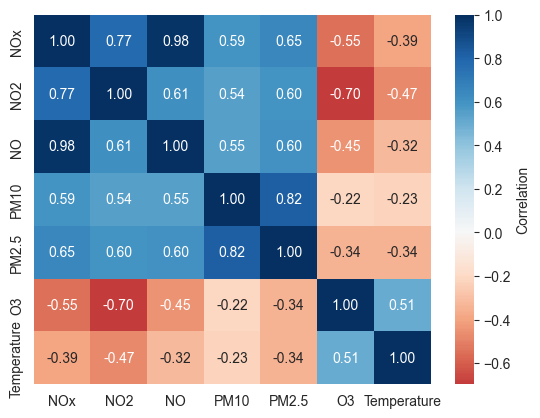

In [14]:
sns.set_style('whitegrid')
sns.heatmap(c,
            cmap='RdBu',
            center=0, annot=True, fmt='.2f',
            cbar_kws=dict(label='Correlation'),
           )

plt.savefig('./plots/2023-11-10_bristol_correlation.png', dpi=150, bbox_inches='tight')
plt.show()